In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape[1:]

170498071/170498071 [==============================] - 4s 0us/step


(32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5505 - accuracy: 0.4346 - val_loss: 1.3565 - val_accuracy: 0.5140
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1782 - accuracy: 0.5847 - val_loss: 1.0968 - val_accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0286 - accuracy: 0.6422 - val_loss: 1.0376 - val_accuracy: 0.6413
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9265 - accuracy: 0.6769 - val_loss: 0.9446 - val_accuracy: 0.6758
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8500 - accuracy: 0.7044 - val_loss: 0.9086 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7857 - accuracy: 0.7255 - val_loss: 0.8918 - val_accuracy: 0.6980
Epoch 7/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.7334 - accuracy: 0.7455 - val_loss: 0.9444 -

In [ ]:
test_loss, test_acc=cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.8797 - accuracy: 0.7088


In [ ]:
import matplotlib.pyplot as plt
import random

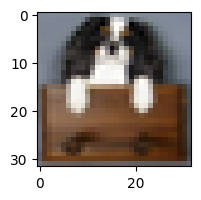

1/1 [==============================] - 0s 159ms/step
This is a:  horse


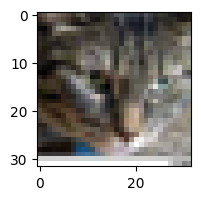

1/1 [==============================] - 0s 21ms/step
This is a:  cat


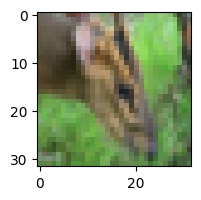

1/1 [==============================] - 0s 23ms/step
This is a:  deer


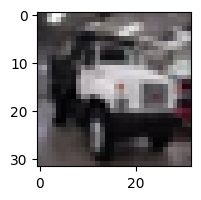

1/1 [==============================] - 0s 33ms/step
This is a:  automobile


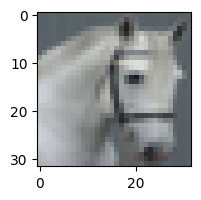

1/1 [==============================] - 0s 22ms/step
This is a:  horse


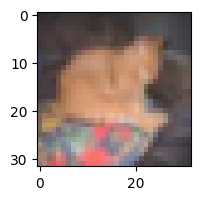

1/1 [==============================] - 0s 23ms/step
This is a:  dog


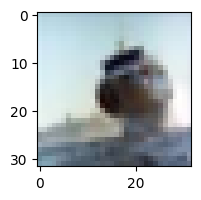

1/1 [==============================] - 0s 22ms/step
This is a:  bird


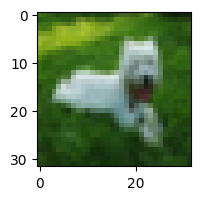

1/1 [==============================] - 0s 24ms/step
This is a:  horse


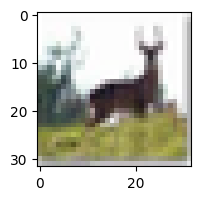

1/1 [==============================] - 0s 23ms/step
This is a:  bird


In [ ]:
ans=[]
for i in range(1,10):
    j=random.randint(1,10000)
    plt.figure(figsize = (15,2))
    plt.imshow(X_test[j])
    plt.show()
    print("This is a: ",classes[np.argmax(cnn.predict(X_test[j].reshape(-1,32,32,3)))])